# Diabetes Prediction
## Unsupervised Learning using PCA and T-SNE

In [23]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Cleaning and Prepping Data:

In [24]:
# Read csv
file = 'Resources/diabetes_health_data.csv'
df = pd.read_csv(file)
df.head(2)
# Diabetes_012:
# 0 = No diabetes, 1 = prediabetes, 2 = diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [25]:
# List column names
df.columns

# Assign labels to diabetes outcomes
labels = df['Diabetes_012']

In [26]:
# Drop 'Diabetes_012' column
df.drop(columns= ['Diabetes_012'], inplace= True)
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [27]:
# Scale data
df_scaled = StandardScaler().fit_transform(df)
df_scaled[0:2] # Show first 2 rows of data == should have 21 columns

array([[ 1.15368814,  1.16525449,  0.19692156,  1.75793567,  1.12092719,
        -0.20563655, -0.3224576 , -1.76281393, -1.31687168,  0.48208665,
        -0.24401415,  0.22686264, -0.30317313,  2.32912057,  1.99859213,
         1.23399871,  2.22361507, -0.88702088,  0.31690008, -1.06559465,
        -1.4744874 ],
       [-0.86678537, -0.85818163, -5.07816412, -0.51180614,  1.12092719,
        -0.20563655, -0.3224576 ,  0.56727485, -1.31687168, -2.07431589,
        -0.24401415, -4.40795367,  3.29844532,  0.45729435, -0.42962961,
        -0.48659241, -0.44971813, -0.88702088, -0.33793279,  0.96327159,
        -2.44013754]])

### PCA: Number of components prediction

- Use a line plot to predict the best number of components in a PCA model. 
    - To reach 90% variance, 17 components are needed
    - To reach 95% variance, 19 components are needed

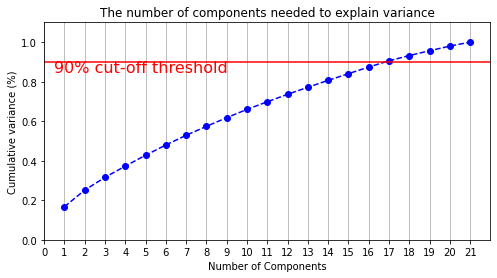

In [28]:
# Predict the number of components to use for PCA
pca = PCA().fit(df_scaled)

plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

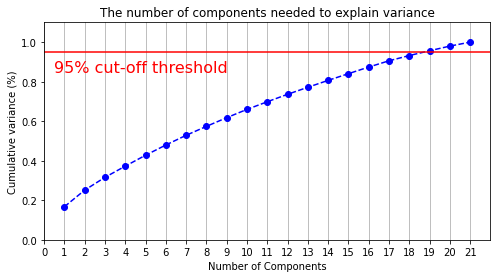

In [29]:
# Predict the number of components to use for PCA
pca = PCA().fit(df_scaled)

plt.rcParams["figure.figsize"] = (8,4)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### Principal Component Analysis (PCA)

Apply PCA to dataset to perform dimensionality reduction. Here 17 and 19 components were applied seperately to test data to see which number of components will display more defined clusters. 

In [140]:
# Apply the Dimensionality Reduction with PCA
pca1 = PCA(n_components= 17)

# Fit scaled data and compare
df_pca1 = pca1.fit_transform(df_scaled)
df_pca1[0]
# reduced down to 17 columns

# 17 PCA
df_diabetes_pca1 = pd.DataFrame(
    data= df_pca1,
    columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 
             'PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17']
)

# Explain the variance
print(pca1.explained_variance_ratio_)

df_diabetes_pca1.head(2)

[0.16713006 0.08396704 0.06480288 0.05667649 0.05512874 0.05176754
 0.04916833 0.04515407 0.04399236 0.04190459 0.03864939 0.03771927
 0.03557995 0.03488982 0.03391184 0.03346775 0.03166342]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,4.775692,0.432141,0.335664,-1.457618,-0.236566,-0.586421,1.570326,0.964589,-0.131766,-0.217164,0.506550,1.070699,0.027713,-0.936558,-0.631151,0.108127,0.242544
1,0.572926,5.459159,-1.556650,3.657566,0.095634,1.588772,-1.068287,0.978154,3.084807,-1.675913,0.198966,0.425214,0.409569,1.990072,-0.582117,1.890264,-0.029968


In [141]:
# Apply the Dimensionality Reduction with PCA
pca2 = PCA(n_components= 19)

# Fit scaled data and compare
df_pca = pca2.fit_transform(df_scaled)
df_pca[0]
# reduced down to 19 columns

# 19 PCA
df_diabetes_pca = pd.DataFrame(
    data= df_pca,
    columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 
             'PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17', 'PC18', 'PC19']
)

# Explain the variance
print(pca2.explained_variance_ratio_)
df_diabetes_pca.head(2)

[0.16713006 0.08396704 0.06480288 0.05667649 0.05512874 0.05176754
 0.04916833 0.04515407 0.04399236 0.04190459 0.03864939 0.03771927
 0.03557995 0.03488982 0.03391184 0.03346775 0.03166342 0.0265529
 0.02430867]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,4.775692,0.432141,0.335664,-1.457618,-0.236566,-0.586421,1.570326,0.964589,-0.131766,-0.217164,0.506550,1.070699,0.027713,-0.936558,-0.631151,0.108127,0.242544,0.345756,0.412942
1,0.572926,5.459159,-1.556650,3.657566,0.095634,1.588772,-1.068287,0.978154,3.084807,-1.675913,0.198966,0.425214,0.409569,1.990072,-0.582117,1.890264,-0.029968,0.054740,0.504112


### T-distributed Stochastic Neighbor Embedding (TSNE): 
#### TSNE Model with 17 principal components

Apply TSNE model to visualize clusters.

In [34]:
import time

In [142]:
# PCA == 17
time_start = time.time()
tsne = TSNE(learning_rate= 200, perplexity= 40)


# Reduce dataset dimension with t_SNE and inspect result
tsne_features1 = tsne.fit_transform(df_diabetes_pca1)

# Shape tsne dataset
tsne_features1.shape

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\Xyn\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 2085.9266476631165 seconds


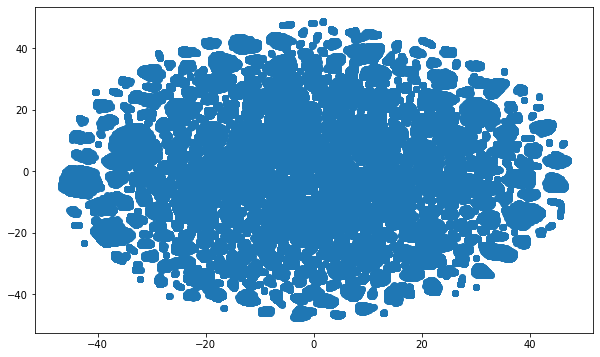

In [143]:
# Plot scatter plot
df_diabetes_pca1['x'] = tsne_features1[:,0]
df_diabetes_pca1['y'] = tsne_features1[:,1]

plt.scatter(df_diabetes_pca1['x'], df_diabetes_pca1['y'])
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

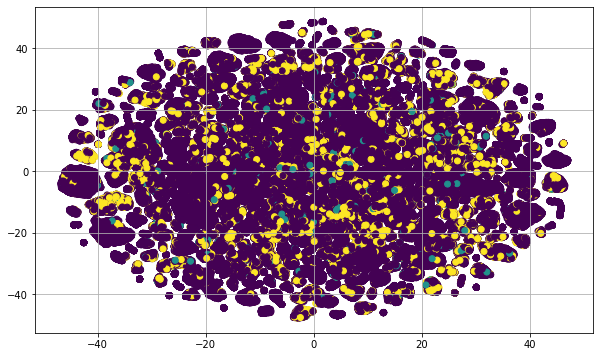

In [144]:
# Plot scatter plot
df_diabetes_pca1['x'] = tsne_features1[:,0]
df_diabetes_pca1['y'] = tsne_features1[:,1]


plt.scatter(df_diabetes_pca1['x'], df_diabetes_pca1['y'], c=labels)
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

### T-distributed Stochastic Neighbor Embedding (TSNE): 
#### TSNE Model with 19 principal components

Apply TSNE model to visualize clusters.

In [50]:
# PCA == 19
time_start = time.time()
tsne = TSNE(learning_rate= 200, perplexity= 40)


# Reduce dataset dimension with t_SNE and inspect result
tsne_features = tsne.fit_transform(df_diabetes_pca)

# Shape tsne dataset
tsne_features.shape

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\Xyn\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 1966.795705318451 seconds


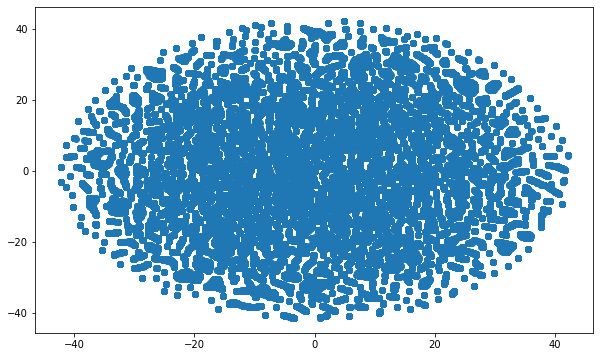

In [148]:
# Plot scatter plot
df_diabetes_pca['x'] = tsne_features[:,0]
df_diabetes_pca['y'] = tsne_features[:,1]

plt.scatter(df_diabetes_pca['x'], df_diabetes_pca['y'])
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

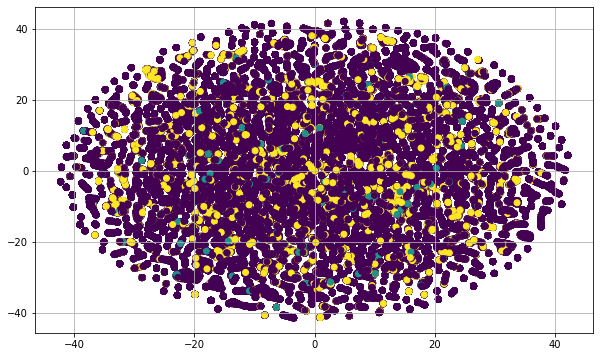

In [149]:
# Plot scatter plot
df_diabetes_pca['x'] = tsne_features[:,0]
df_diabetes_pca['y'] = tsne_features[:,1]


plt.scatter(df_diabetes_pca['x'], df_diabetes_pca['y'], c=labels)
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [150]:
labels.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [151]:
df_diabetes_pca.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,classification,x,y
0,4.775692,0.432141,0.335664,-1.457618,-0.236566,-0.586421,1.570326,0.964589,-0.131766,-0.217164,...,0.027713,-0.936558,-0.631151,0.108127,0.242544,0.345756,0.412942,1,12.878822,-10.980285
1,0.572926,5.459159,-1.556650,3.657566,0.095634,1.588772,-1.068287,0.978154,3.084807,-1.675913,...,0.409569,1.990072,-0.582117,1.890264,-0.029968,0.054740,0.504112,4,-4.046062,35.612095


### K-means
Using dataset with 19 principal components, create an elbow curve plot to find the k-means. 

In [152]:
# Create elbow plot to identify best number of clusters

# Array to hold inertia values
inertia = []

# k-values == number of clusters to test
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Use a loop to calculate the inertia values based on the k values (number of clusters)
for value in k: 
    
    # Set up kmeans model
    model = KMeans(n_clusters= value, random_state= 42)
    
    # Fit the model into DF
    model.fit(df_diabetes_pca)
    
    # Calulate and extract the inertia_property, then store into array
    inertia.append(model.inertia_)
    
# Create a df for elbow curve
elbowData = {
    'k' : k, 
    'inertia' : inertia
}

df_elbow = pd.DataFrame(elbowData)
df_elbow.head()
    

,k,inertia
0,1,1.836663e+08
1,2,1.215096e+08
2,3,7.893350e+07
3,4,5.951080e+07
4,5,4.959017e+07


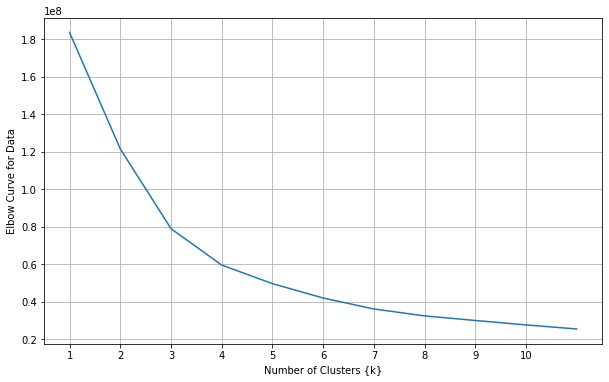

In [153]:
# Plot the elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters {k}')
plt.ylabel('Elbow Curve for Data')
plt.grid()
plt.show()

### Scatter Plots based on k values:

Create a function that will display scatter plots based on its k values. 
Below are 3 scatterplots: 
- k = 3
- k = 4
- k = 6

In [154]:
# Function to predict k value

def get_clusters(k, data):
    
    # Set up kMeans model
    model = KMeans(n_clusters = k, random_state= 42)
    
    # Fit the model using data
    model.fit(data)
    
    # Calculate the predictions
    predictions = model.predict(data)
    
    # Use the labels_ property to label the data
    data['classification'] = model.labels_
    
    # Return the dataframe generated
    return data

#### K = 3

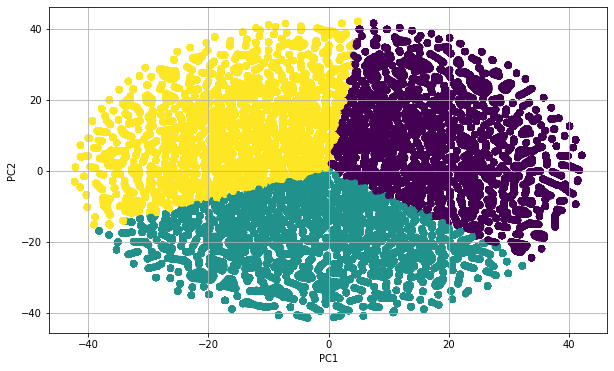

In [155]:
# Plot using k= 3
get_clusters(3, df_diabetes_pca)

# Show df
df_diabetes_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_diabetes_pca['x'], df_diabetes_pca['y'], c= df_diabetes_pca['classification'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.show()
    
show_clusters(df_diabetes_pca)

#### K = 4

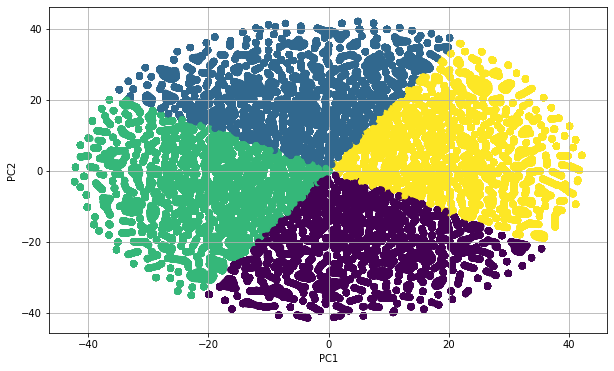

In [156]:
# Plot using k= 4
get_clusters(4, df_diabetes_pca)

# Show df
df_diabetes_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_diabetes_pca['x'], df_diabetes_pca['y'], c= df_diabetes_pca['classification'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.show()
    
show_clusters(df_diabetes_pca)

#### K = 6

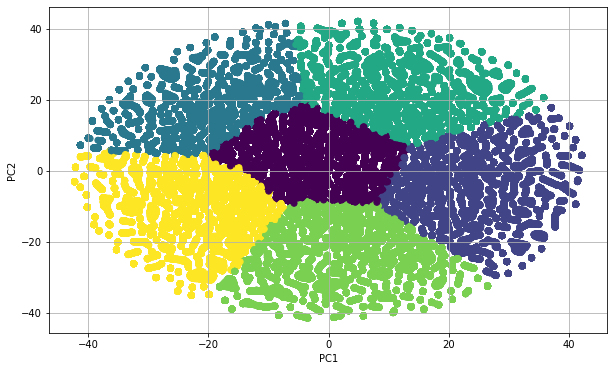

In [159]:
# Plot using k= 6
get_clusters(6, df_diabetes_pca)

# Show df
df_diabetes_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_diabetes_pca['x'], df_diabetes_pca['y'], c= df_diabetes_pca['classification'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.show()
    
show_clusters(df_diabetes_pca)

### 3D Scatterplot



C:\Users\Xyn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """Entry point for launching an IPython kernel.


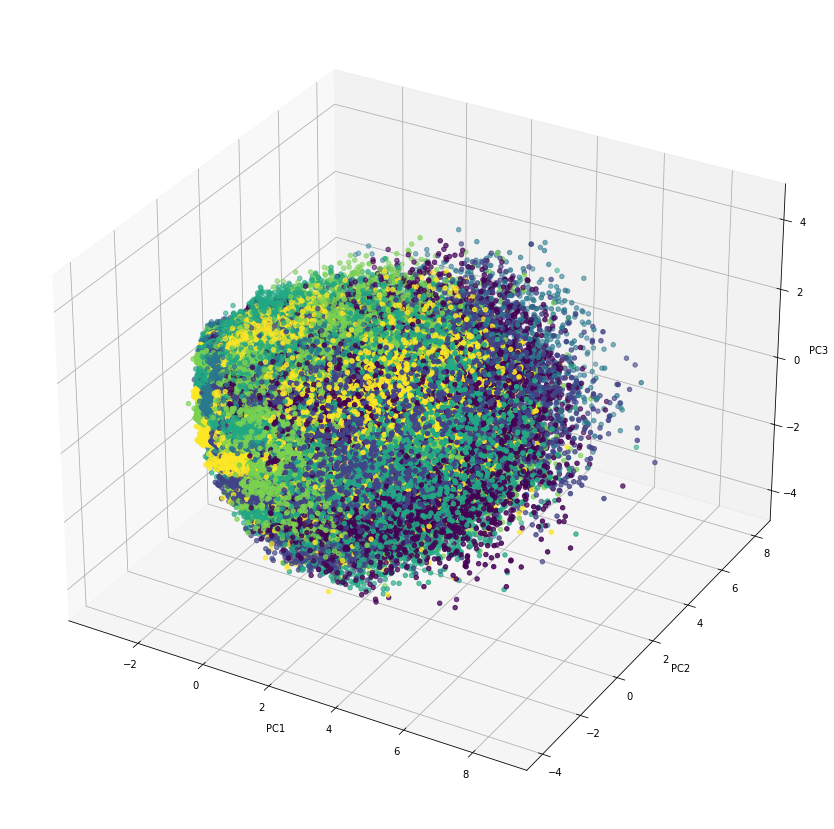

In [170]:
ax = plt.figure(figsize= (20, 15)).gca(projection= '3d')
ax.scatter(xs= df_diabetes_pca['PC1'], 
           ys= df_diabetes_pca['PC2'], 
           zs= df_diabetes_pca['PC3'], 
           c= df_diabetes_pca['classification'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [161]:
df_diabetes_pca.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,classification,x,y
0,4.775692,0.432141,0.335664,-1.457618,-0.236566,-0.586421,1.570326,0.964589,-0.131766,-0.217164,...,0.027713,-0.936558,-0.631151,0.108127,0.242544,0.345756,0.412942,1,12.878822,-10.980285
1,0.572926,5.459159,-1.556650,3.657566,0.095634,1.588772,-1.068287,0.978154,3.084807,-1.675913,...,0.409569,1.990072,-0.582117,1.890264,-0.029968,0.054740,0.504112,3,-4.046062,35.612095


In [162]:
tsneDF = df_diabetes_pca.drop(columns= ['x', 'y'])
tsneDF.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,classification
0,4.775692,0.432141,0.335664,-1.457618,-0.236566,-0.586421,1.570326,0.964589,-0.131766,-0.217164,0.506550,1.070699,0.027713,-0.936558,-0.631151,0.108127,0.242544,0.345756,0.412942,1
1,0.572926,5.459159,-1.556650,3.657566,0.095634,1.588772,-1.068287,0.978154,3.084807,-1.675913,0.198966,0.425214,0.409569,1.990072,-0.582117,1.890264,-0.029968,0.054740,0.504112,3


In [163]:
# Define X and y for testing and training
X = tsneDF.drop(columns= ['classification'])
y = tsneDF['classification']

In [164]:
# Split data into testing and training models
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [165]:
# Test data in randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state= 42, n_estimators= 500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9747871333964049


[0.06298644 0.04818862 0.07130151 0.0360808  0.04833489 0.05066268
 0.05229707 0.05635688 0.07258192 0.03773281 0.04620617 0.06648774
 0.06249052 0.05928623 0.05523118 0.06022639 0.05396239 0.03138815
 0.02819761]


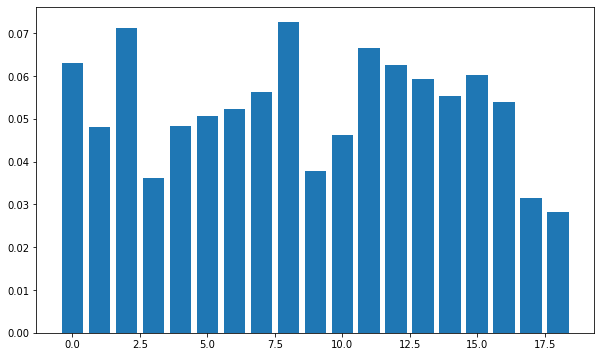

In [166]:
# Columns (PC) with most importance
clf_features = clf.feature_importances_
print(clf_features)

plt.bar(x = range(len(clf_features)), height=clf_features)
plt.show()

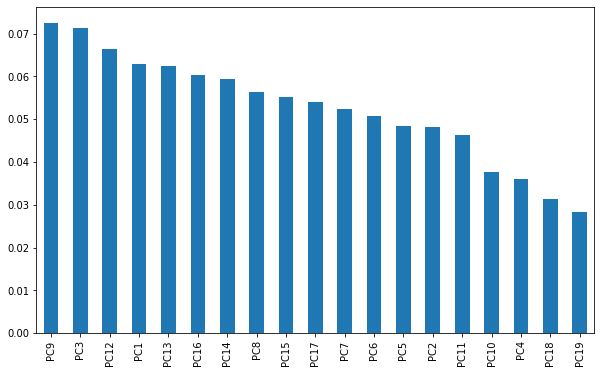

In [167]:
pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:200].plot(kind='bar');

In [136]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()

array([ True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False])

There are 12 principal components that have the most importance: PC9, PC3, PC12, PC1, PC13, PC16, PC14, PC8, PC15, PC17, PC7, PC6.